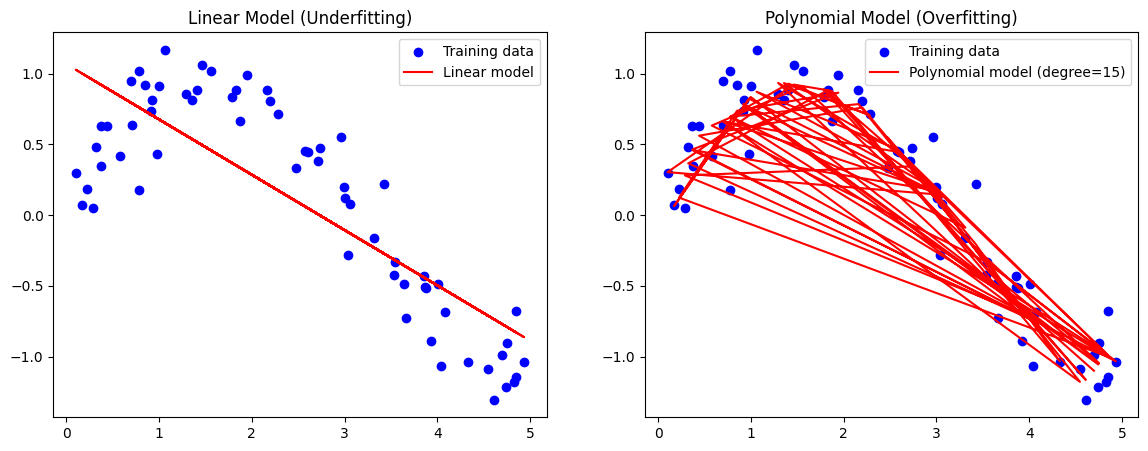

Linear model MSE (train): 0.17402113106296563
Linear model MSE (test): 0.2777253188949047
Polynomial model MSE (train): 0.03429596763732574
Polynomial model MSE (test): 0.16301963346805448


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_train_linear = linear_regressor.predict(X_train)
y_pred_test_linear = linear_regressor.predict(X_test)

# Fit polynomial model
poly_features = PolynomialFeatures(degree=15)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
y_pred_train_poly = poly_regressor.predict(X_poly_train)
y_pred_test_poly = poly_regressor.predict(X_poly_test)

# Plot results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_pred_train_linear, color='red', label='Linear model')
plt.title('Linear Model (Underfitting)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_pred_train_poly, color='red', label='Polynomial model (degree=15)')
plt.title('Polynomial Model (Overfitting)')
plt.legend()

plt.show()

# Print mean squared errors
print("Linear model MSE (train):", mean_squared_error(y_train, y_pred_train_linear))
print("Linear model MSE (test):", mean_squared_error(y_test, y_pred_test_linear))
print("Polynomial model MSE (train):", mean_squared_error(y_train, y_pred_train_poly))
print("Polynomial model MSE (test):", mean_squared_error(y_test, y_pred_test_poly))


Cross Validation


In [5]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5)
model = LinearRegression()
mse_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate the average MSE
average_mse = np.mean(mse_scores)
print("Mean Squared Error from Cross-Validation:", average_mse)


Mean Squared Error from Cross-Validation: 0.4889831942030235
